In [1]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], #your
     [0.55, 0.87, 0.66], #journey
     [0.57, 0.85, 0.64], #starts
     [0.22, 0.58, 0.33], #with
     [0.77, 0.25, 0.10], #one
     [0.05, 0.80, 0.55]] #step
)

In [2]:
# journey
input_query = inputs[1]
input_query

tensor([0.5500, 0.8700, 0.6600])

In [3]:
input_1 = inputs[0]
input_1

tensor([0.4300, 0.1500, 0.8900])

In [4]:
torch.dot(input_query, input_1)

tensor(0.9544)

In [5]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [6]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
attn_weights_2_tmp.sum()

tensor(1.0000)

In [7]:
def softmax(x):
    #not stable sometimes
    return torch.exp(x)/torch.exp(x).sum(dim=0)

softmax(attn_scores_2)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [8]:
torch.softmax(attn_scores_2, dim= 0)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

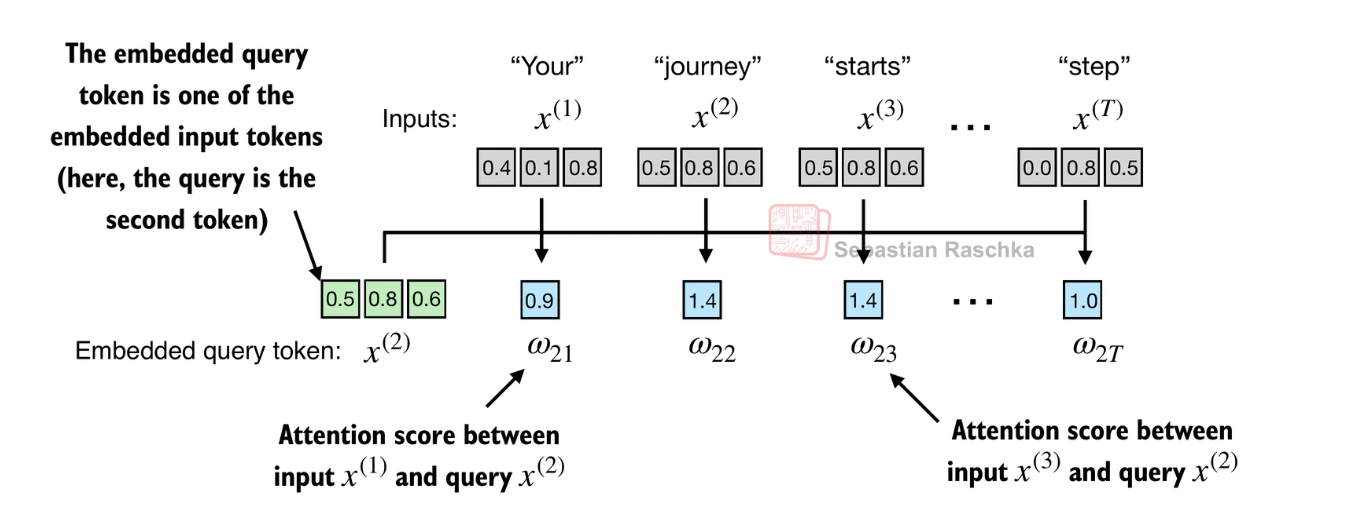

In [9]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)

In [10]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)


for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)    

tensor([0.4419, 0.6515, 0.5683])


In [11]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)


print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [13]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [15]:
attn_weights = torch.softmax(attn_scores, dim = 1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

context_vector[i] =
    attn_weights[i,0] * inputs[0]
  + attn_weights[i,1] * inputs[1]
  + ...
  + attn_weights[i,5] * inputs[5]


In [17]:
all_context_vector = attn_weights @ inputs
all_context_vector

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])